In [ ]:
# 我的成果報告 學生:林青霞
# 1.1 Machine Learing (ML): Climate data, Regressin, KNN, Logistic
# 1.2 CNN, Gradio
# 1.3 Self improvement
# 2. Python, Colab, Comment 註解說明
# 3. Code 程式語言
# 4. Result 成果

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr

In [ ]:
# 寫一個測試的 function 搭配使用 gradio
def bmi_cal(h, w):
  h = float(h)/100
  w = float(w)
  bmi = w/(h**2)
  message = f"Your BMI is {bmi:.2f}."
  return message

In [ ]:
# 呼叫測試
bmi_cal(178, 78)

'Your BMI is 24.62.'

In [ ]:
iface = gr.Interface(bmi_cal,
                     inputs=["number","number"],
                     outputs="text")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.utils import to_categorical #1,2,3,4
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_test.shape

(10000, 28, 28)

0


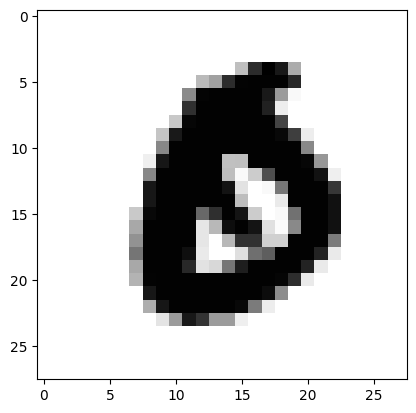

In [ ]:
n = 9455
x_train[n]
print(y_train[n])
plt.imshow(x_train[n], cmap='Greys')

In [ ]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [ ]:
model = Sequential()
model.add(Dense(100, input_dim=784, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='mse', optimizer=SGD(learning_rate=0.087), metrics=['accuracy'])


In [ ]:
model.summary() #rest time 8:20

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 99710 (389.49 KB)
Trainable params: 99710 (389.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
600/600 [==============================] - 8s 3ms/step - loss: 0.0859 - accuracy: 0.3065
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0589 - accuracy: 0.6135
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0324 - accuracy: 0.8048
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0220 - accuracy: 0.8680
Epoch 5/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0179 - accuracy: 0.8888
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0159 - accuracy: 0.8996
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0147 - accuracy: 0.9072
Epoch 8/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0138 - accuracy: 0.9125
Epoch 9/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0131 - accuracy: 0.9166
Epoch 10/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0125 - accuracy: 0.9201

In [ ]:
x_test[5].shape

(784,)

In [ ]:
inp = x_test[5].reshape(1, 784)

In [ ]:
model.predict(inp)

1/1 [==============================] - 0s 100ms/step


array([[7.6677765e-07, 9.8585409e-01, 1.1230909e-03, 3.6022854e-03,
        3.2455730e-04, 4.8966339e-04, 5.7451351e-04, 3.8877109e-03,
        3.6222539e-03, 5.2097044e-04]], dtype=float32)

In [ ]:
y_predict = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 1s 2ms/step


the predict number is: 9


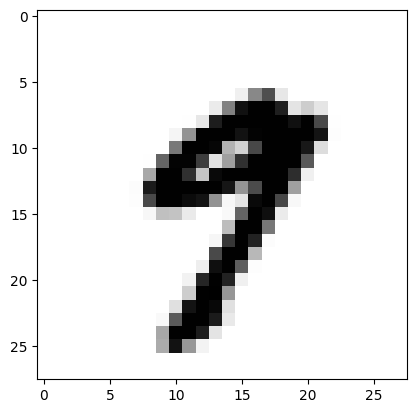

In [ ]:
n = 20
print('the predict number is:', y_predict[n])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys');

In [ ]:
from ipywidgets import interact_manual

In [ ]:
def test(no):
  plt.imshow(x_test[no].reshape(28, 28), cmap='Greys')
  print("My CNN model say the number is:", y_predict[no])

interactive(children=(IntSlider(value=4999, description='no', max=9999), Button(description='Run Interact', st…

<function __main__.test(no)>

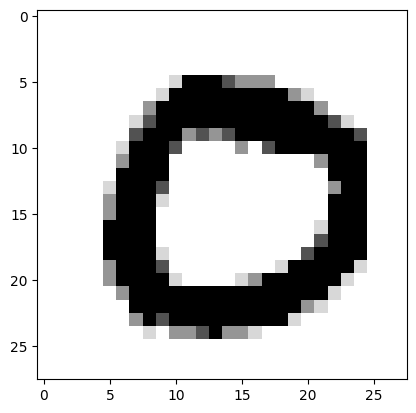

In [ ]:
interact_manual(test, no=(0, 9999))

In [ ]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0094 - accuracy: 0.9404


In [ ]:
print('loss:', score[0])
print('accu: ', score[1])

loss: 0.009353216737508774
accu:  0.9404000043869019


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [ ]:
model.save('my_dnn_model')